# Holiday Package Prediction

# Lifecycle of Machine Learning

- Understanding the Problem Statement
- Data Collection
- Data Cleaning
- Exploratory Data Analysis
- Data Pre-processing
- Model Building
- Model Evaluation
- Choose Best Model

# 1. Problem Statement

- "Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

- However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package.

- Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

# 2. Data Collection

- Dataset Collected from this link: https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction/data
- Dataset contains 4888 rows and 20 columns.

# 3. Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 4. Basic/Fundamental Analysis Of the Data

In [2]:
df = pd.read_csv(r"data/Travel.csv")

### 4.1 Size of the data

In [3]:
df.shape

(4888, 20)

No of rows: 4888

No of columns: 20

### 4.2 First 5 rows of the data

In [4]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### 4.3 Datatype of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

### 4.4 Check Missing values

In [6]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**Conclusion**
- There are missing values present.

### 4.5 Statistical Analysis of the Data

In [7]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


### 4.6 Check for duplicate Values

In [8]:
df.duplicated().sum()

np.int64(0)

**Conclusion**
- No duplicate values present

# 5. Univariate Analysis

In [9]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

### Q.) What is the distribution of customers who have taken the holiday package versus those who haven't?


<Axes: xlabel='ProdTaken', ylabel='count'>

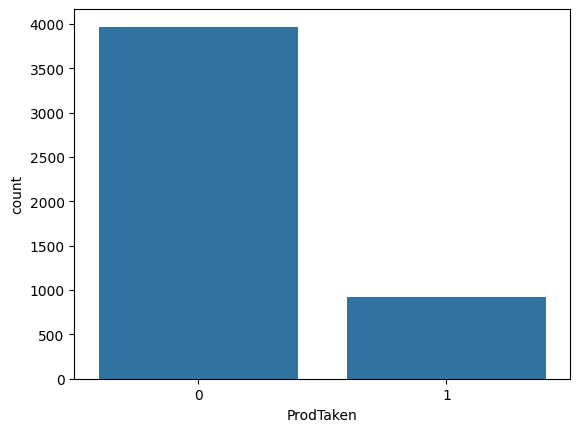

In [10]:
sns.countplot(x="ProdTaken",data=df)

<Axes: ylabel='count'>

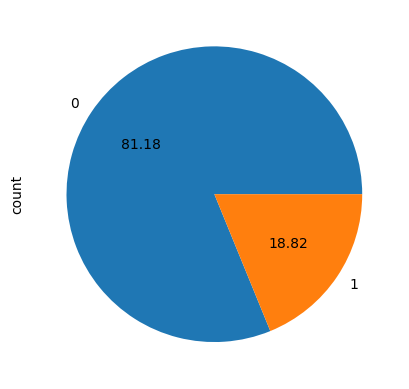

In [11]:
df["ProdTaken"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- In `ProdTaken` 81% people have not purchased the package.
- It is a imbalanced feature

### Q) What is the proportion of different types of contacts?

<Axes: xlabel='TypeofContact', ylabel='count'>

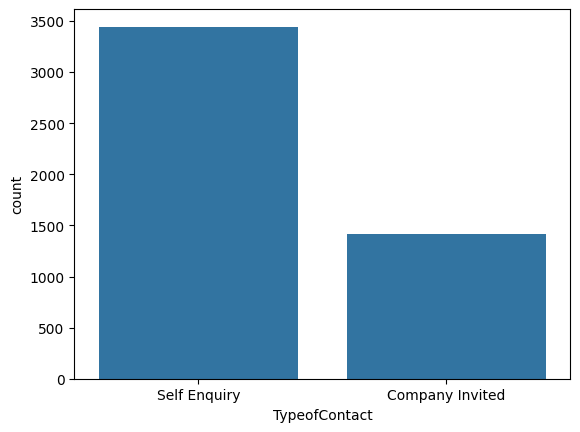

In [12]:
sns.countplot(x="TypeofContact",data=df)

<Axes: ylabel='count'>

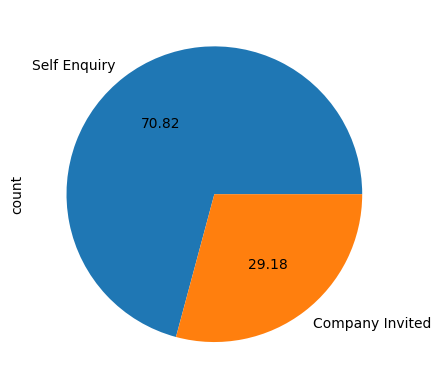

In [13]:
df["TypeofContact"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion:**
- Most of the customers have personally contacted to get details regarding the package

### Q) How are the customers distributed across different city tiers?

<Axes: xlabel='CityTier', ylabel='count'>

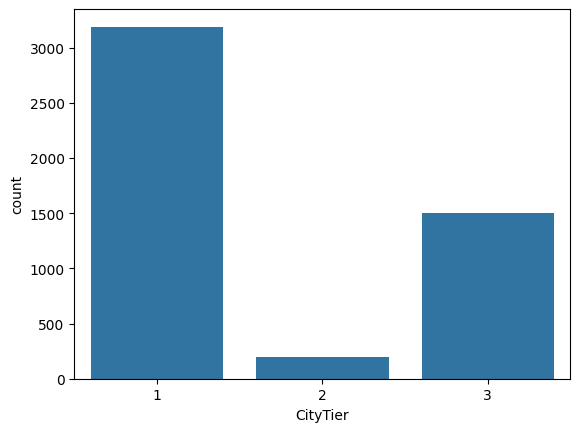

In [14]:
sns.countplot(x="CityTier",data=df)

<Axes: ylabel='count'>

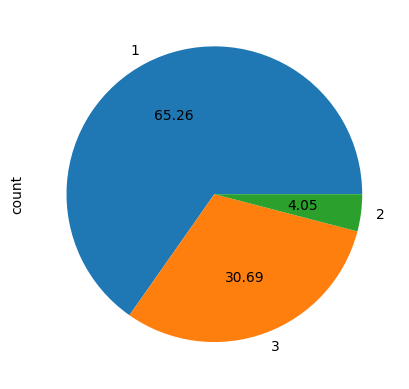

In [15]:
df["CityTier"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion:**
- Most of the customers are from tier 1 city.

### Q) What are the most common occupations among the customers?

<Axes: xlabel='Occupation', ylabel='count'>

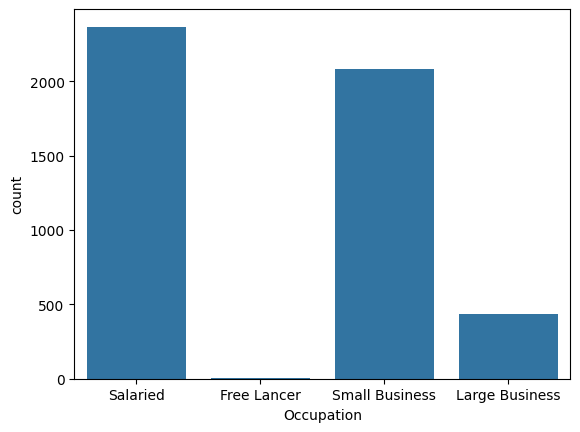

In [16]:
sns.countplot(x="Occupation",data=df)

<Axes: ylabel='count'>

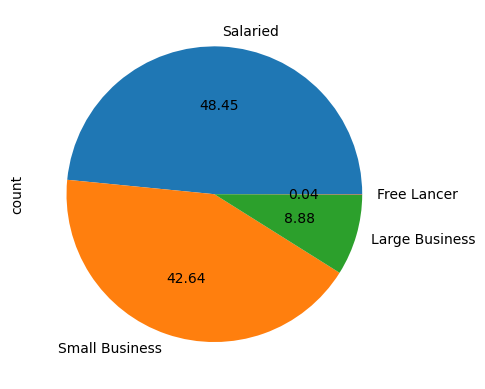

In [17]:
df["Occupation"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most common occupation of Customer is that they are Salaried Employees followed by Small Business

### Q) What is the gender distribution of the customers?

<Axes: xlabel='Gender', ylabel='count'>

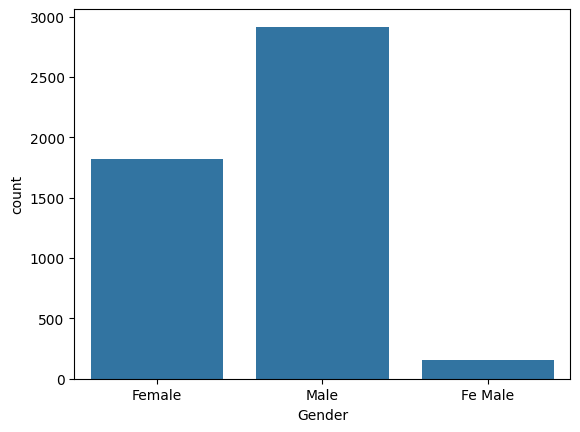

In [18]:
sns.countplot(x="Gender",data=df)

<Axes: ylabel='count'>

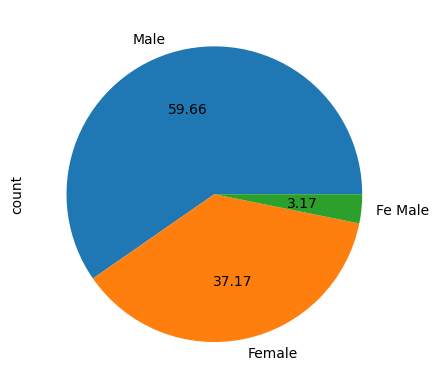

In [19]:
df["Gender"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most of the customers are males.
- There is some typing mistake in Female.

### Q) What is the distribution of different products pitched to the customers?

<Axes: xlabel='ProductPitched', ylabel='count'>

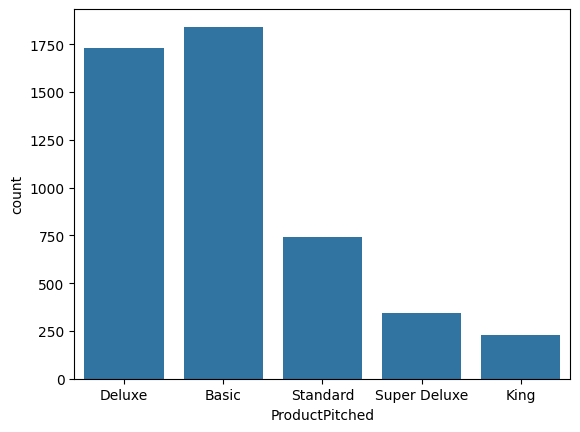

In [20]:
sns.countplot(x="ProductPitched",data=df)

<Axes: ylabel='count'>

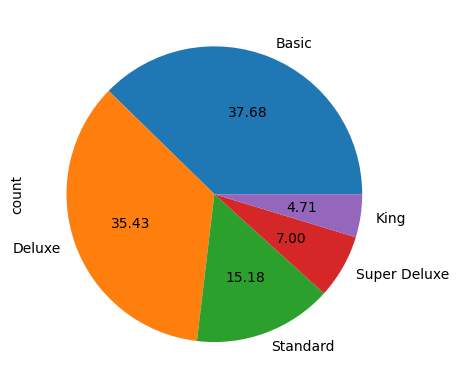

In [21]:
df["ProductPitched"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- The Product Pitched by SalesMan is Basic followed by Deluxe

### Q) What is the distribution of preferred property star ratings among the customers?

<Axes: xlabel='PreferredPropertyStar', ylabel='count'>

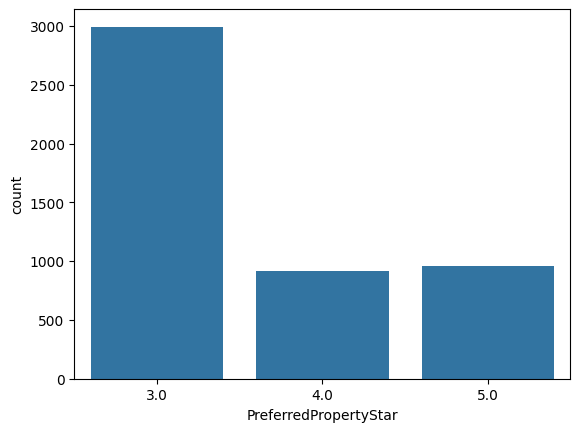

In [22]:
sns.countplot(x="PreferredPropertyStar",data=df)

<Axes: ylabel='count'>

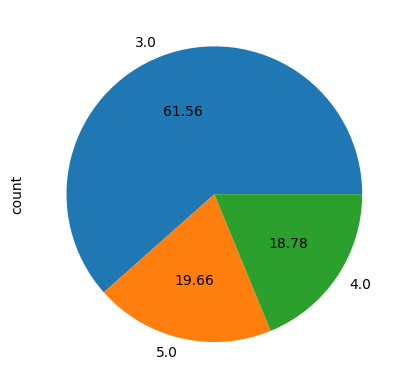

In [23]:
df["PreferredPropertyStar"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most of the customer prefers 3-star hotel followed by 5 star hotel

### Q) What is the marital status distribution of the customers?

<Axes: xlabel='MaritalStatus', ylabel='count'>

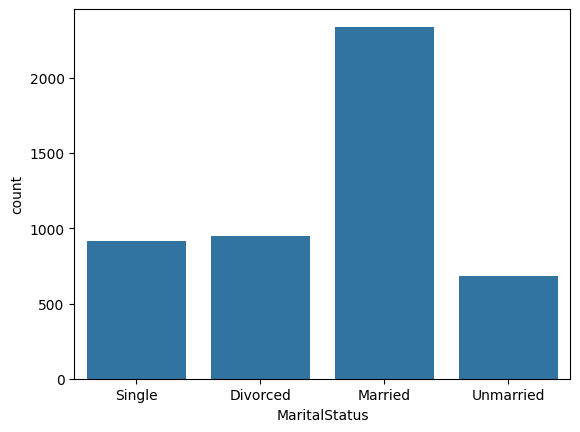

In [24]:
sns.countplot(x="MaritalStatus",data=df)

<Axes: ylabel='count'>

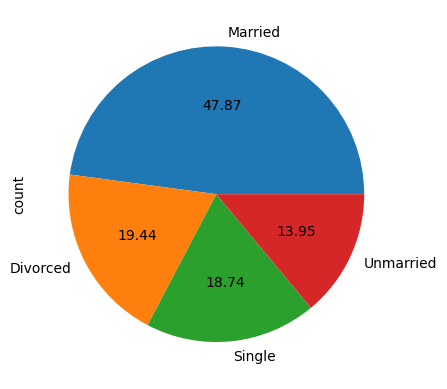

In [25]:
df["MaritalStatus"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most of the customer are Married followed by Divorced

### Q) What proportion of customers have a passport?

<Axes: xlabel='Passport', ylabel='count'>

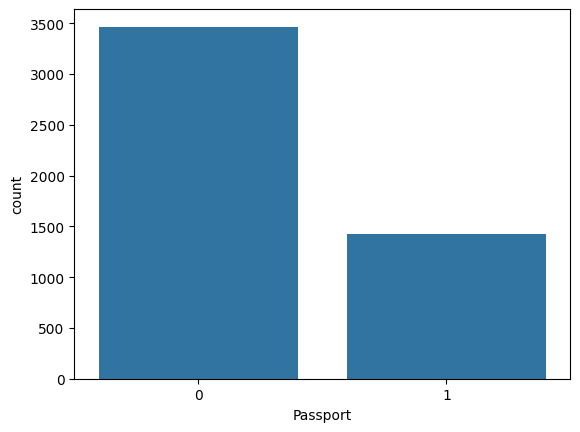

In [26]:
sns.countplot(x="Passport",data=df)

<Axes: ylabel='count'>

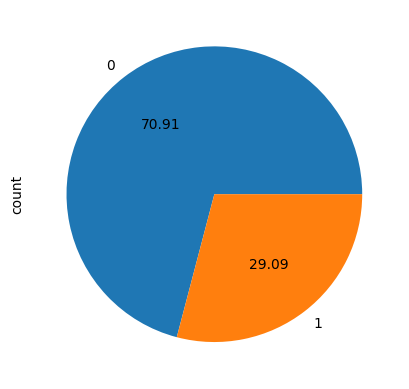

In [27]:
df["Passport"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most of the customers do not have a passport

### Q) What proportion of customers own a car?


<Axes: xlabel='OwnCar', ylabel='count'>

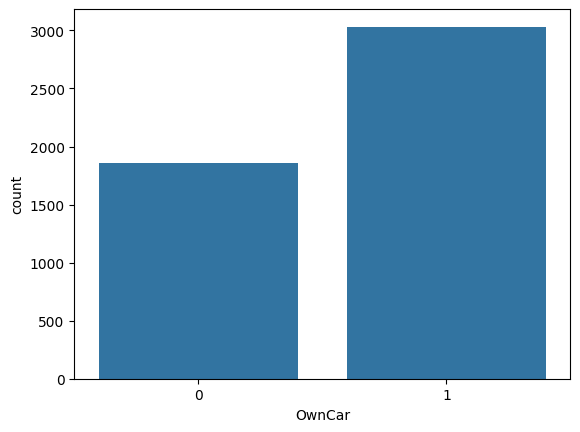

In [28]:
sns.countplot(x="OwnCar",data=df)

<Axes: ylabel='count'>

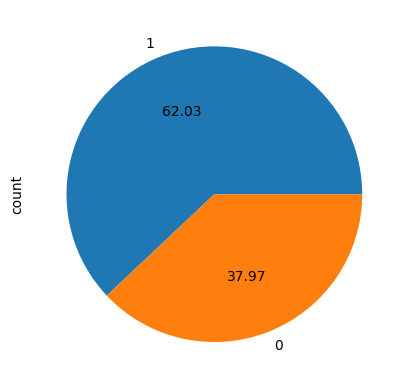

In [29]:
df["OwnCar"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most of the customers have their own car

### Q) What are the most common job designations among the customers?

<Axes: xlabel='Designation', ylabel='count'>

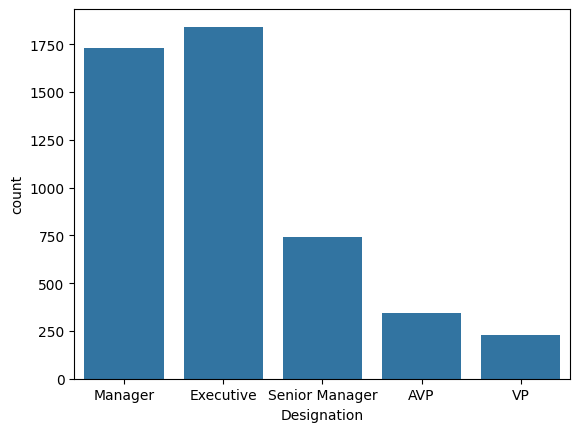

In [30]:
sns.countplot(x="Designation",data=df)

<Axes: ylabel='count'>

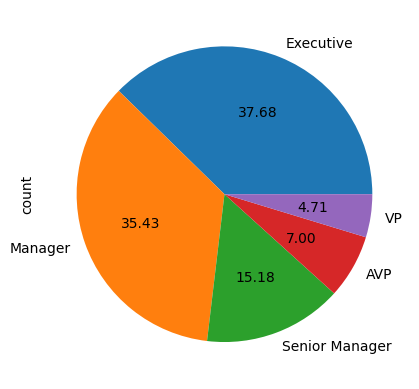

In [31]:
df["Designation"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Most of the customers are currently working as executive followed by Manager

### What is the average number of persons visiting?
What is the distribution of the number of persons visiting?

<Axes: xlabel='NumberOfPersonVisiting', ylabel='count'>

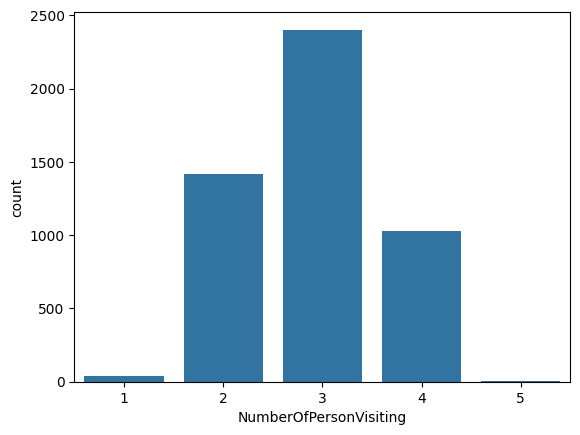

In [32]:
sns.countplot(x="NumberOfPersonVisiting",data=df)

<Axes: ylabel='count'>

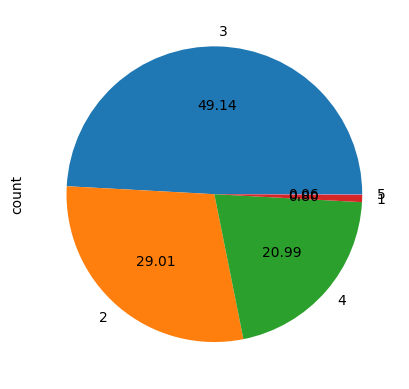

In [33]:
df["NumberOfPersonVisiting"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Mostly 3 members are there with the customer.

### Q) What is the distribution of the number of follow-ups?

<Axes: xlabel='NumberOfFollowups', ylabel='count'>

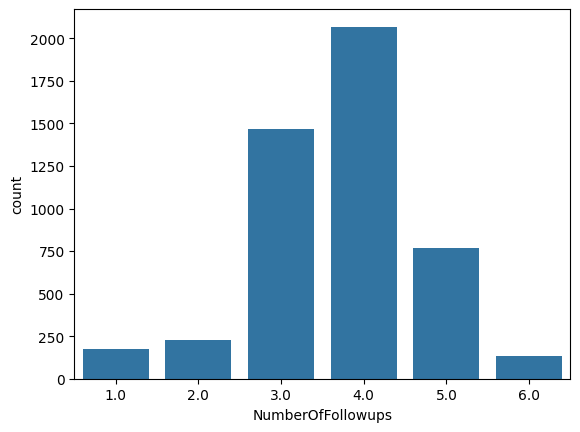

In [34]:
sns.countplot(x="NumberOfFollowups",data=df)

<Axes: ylabel='count'>

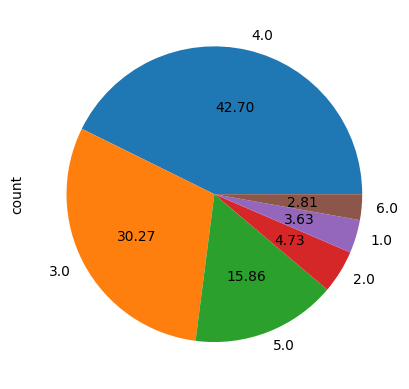

In [35]:
df["NumberOfFollowups"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Mostly 4 followups is taken by the SalesMan after pitching the product

### Q) What is the distribution of the number of trips taken?

<Axes: xlabel='NumberOfTrips', ylabel='count'>

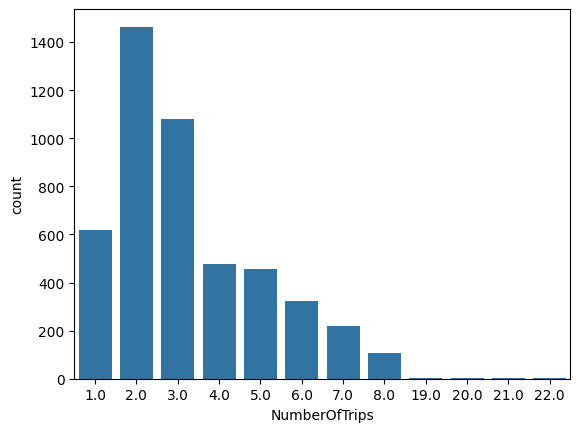

In [36]:
sns.countplot(x="NumberOfTrips",data=df)

<Axes: ylabel='count'>

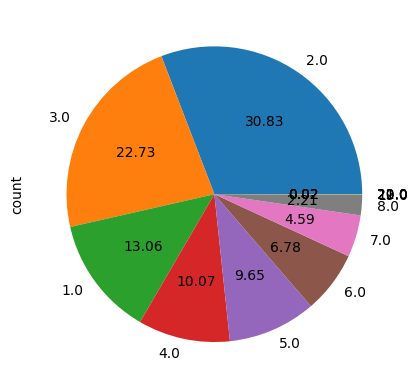

In [37]:
df["NumberOfTrips"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Average number of trips taken by customer is 2

### Q) What is the distribution of pitch satisfaction scores?

<Axes: xlabel='PitchSatisfactionScore', ylabel='count'>

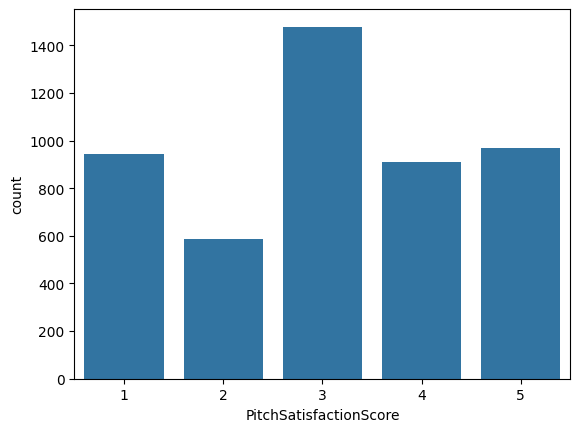

In [38]:
sns.countplot(x="PitchSatisfactionScore",data=df)

<Axes: ylabel='count'>

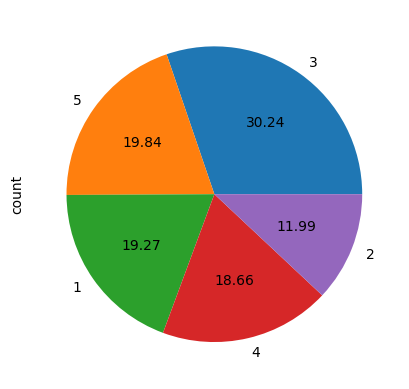

In [39]:
df["PitchSatisfactionScore"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclusion**
- Majority the Sales Pitch Score is 3

### Q) What is the distribution of the number of children visiting?

<Axes: xlabel='NumberOfChildrenVisiting', ylabel='count'>

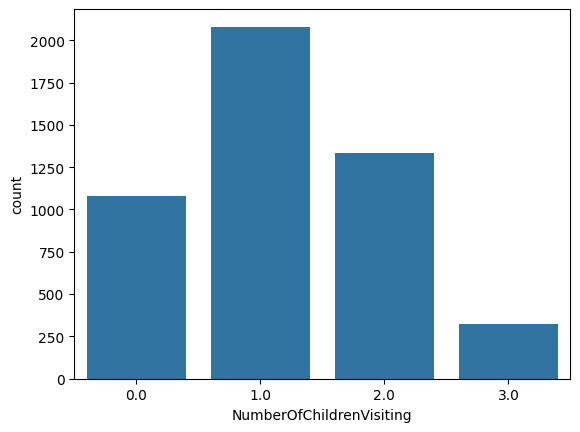

In [40]:
sns.countplot(x="NumberOfChildrenVisiting",data=df)

<Axes: ylabel='count'>

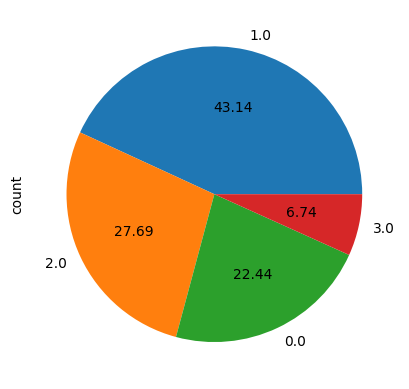

In [41]:
df["NumberOfChildrenVisiting"].value_counts().plot(kind="pie",autopct="%.2f")

**Conclsuion**
- Customers with 1 children is high

### Q) What is the average duration of the sales pitch?

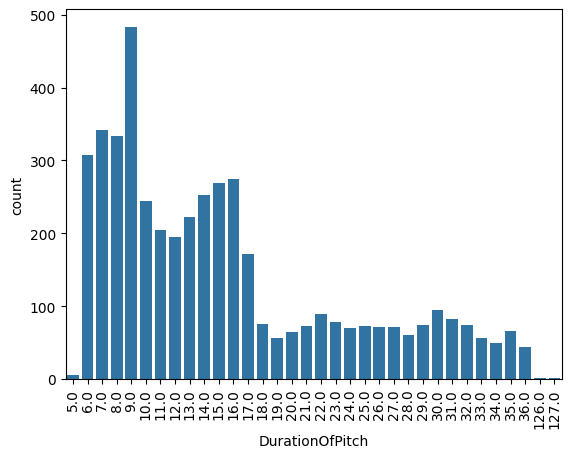

In [42]:
sns.countplot(x="DurationOfPitch",data=df)
plt.xticks(rotation=90)
plt.show()

In [43]:
df["DurationOfPitch"].mean()

np.float64(15.490834591330602)

In [44]:
df["DurationOfPitch"].skew()

np.float64(1.7520370490349106)

<Axes: xlabel='DurationOfPitch', ylabel='Density'>

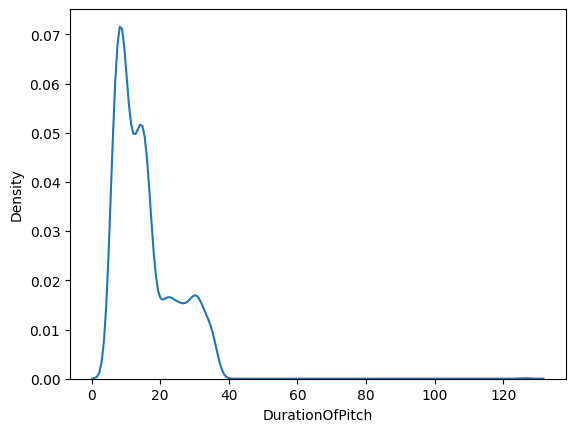

In [45]:
sns.kdeplot(df["DurationOfPitch"])

<Axes: ylabel='DurationOfPitch'>

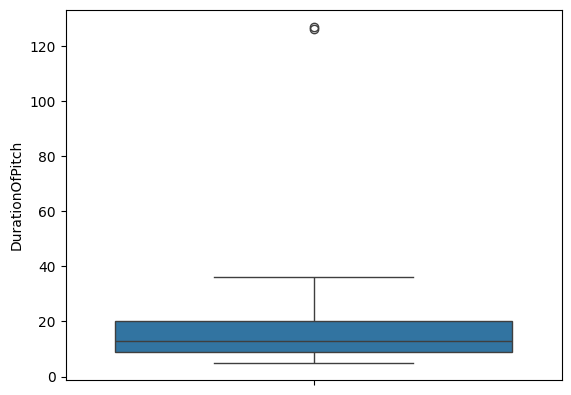

In [46]:
sns.boxplot(df["DurationOfPitch"])

**Conclusion**
- It is right-skewed distribution
- There are outliers

### Q) What is the average age of the customers?

In [47]:
df["Age"].mean()

np.float64(37.62226512226512)

In [48]:
df["Age"].skew()

np.float64(0.38298868373855377)

<Axes: xlabel='Age', ylabel='Density'>

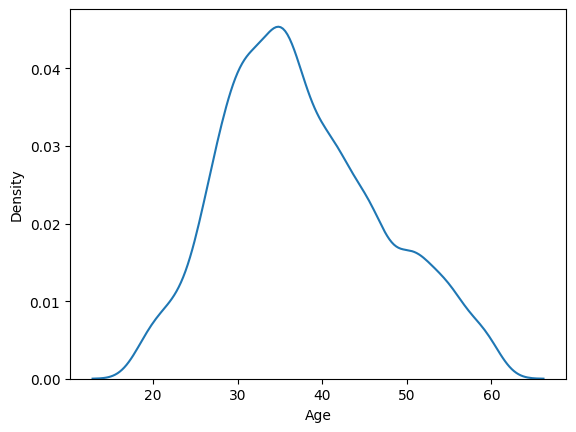

In [49]:
sns.kdeplot(df["Age"])

<Axes: ylabel='Age'>

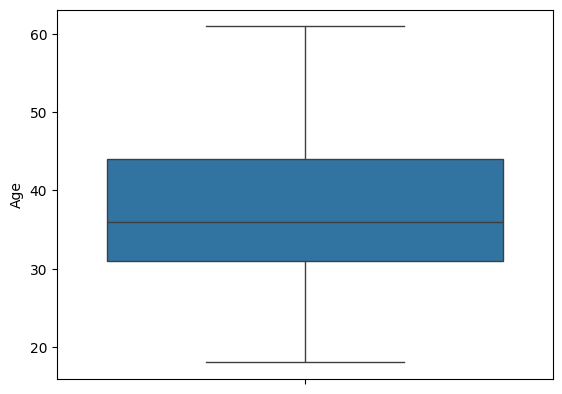

In [50]:
sns.boxplot(df["Age"])

**Conclusion**
- It follows normal distribution
- There are no outliers

### Q) What is the average monthly income of the customers?

In [51]:
df["MonthlyIncome"].mean()

np.float64(23619.85349087003)

In [52]:
df["MonthlyIncome"].skew()

np.float64(1.949159831766865)

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

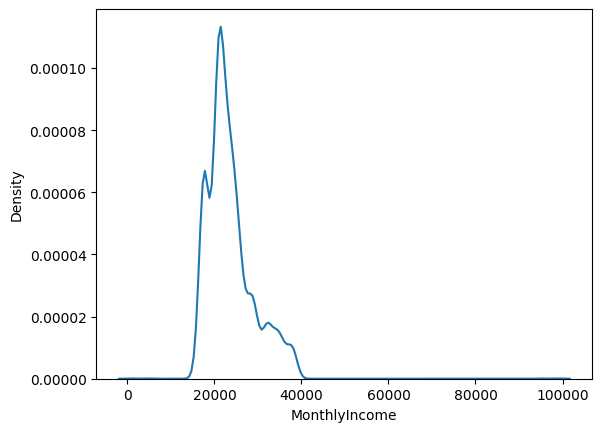

In [53]:
sns.kdeplot(df["MonthlyIncome"])

<Axes: ylabel='MonthlyIncome'>

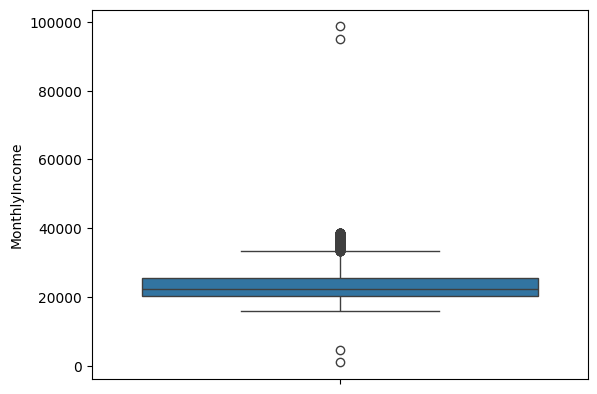

In [54]:
sns.boxplot(df["MonthlyIncome"])

**Conclusion**
- It is right-skewed distribution
- It contains outliers

# 6. Multivariate Analysis

In [55]:
df.corr(numeric_only=True)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


<Axes: >

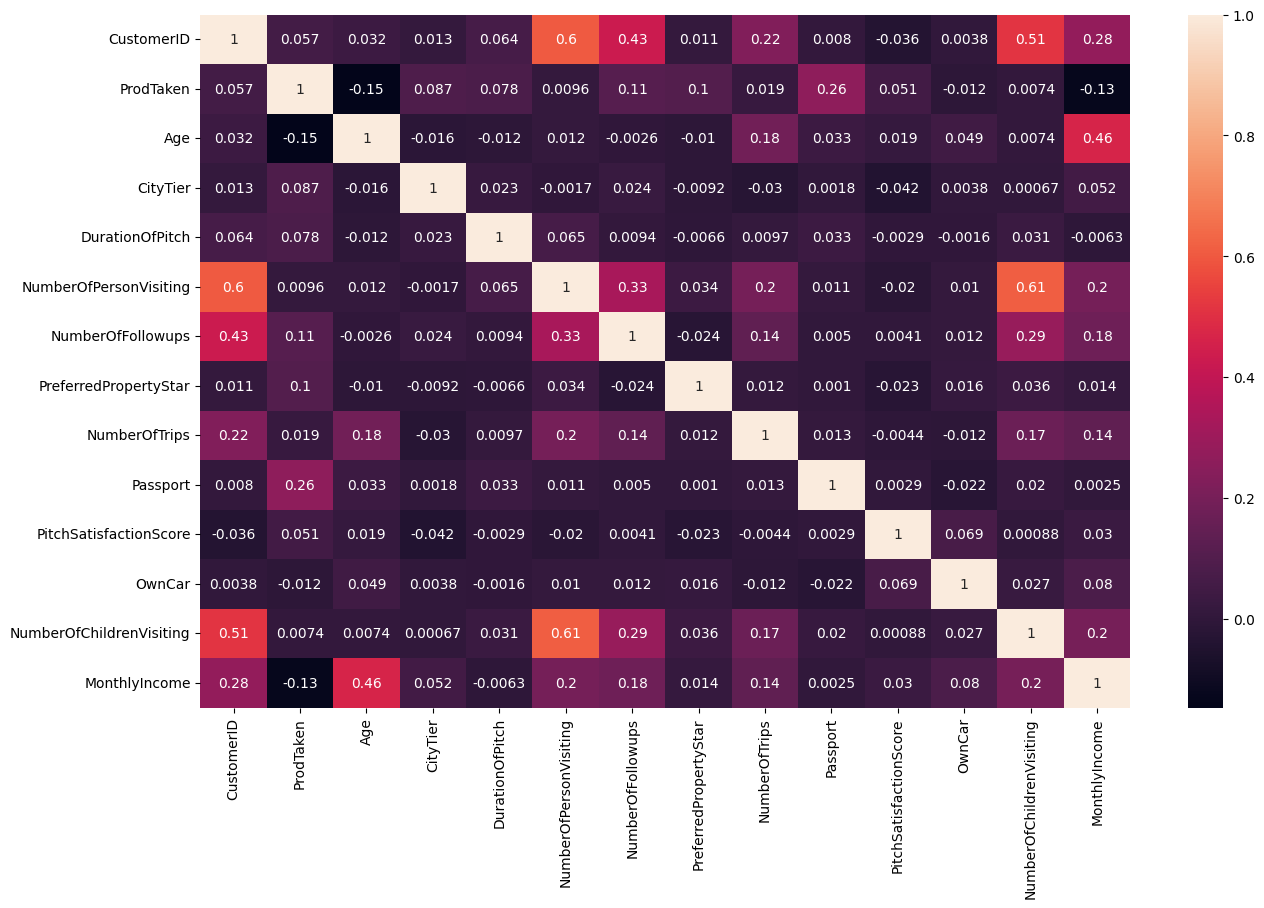

In [56]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(numeric_only=True),annot=True)

**Conclusion**
- NumberOfPersonVisiting and NumberOfChildrenVisiting are strongly correlated
- ProdTaken and Age are weakly correlated
- Monthly Income and ProdTaken are weakly correlated
- Age and MonthlyIncome are strongly correlated

# 7. Bivariate Analysis

### Q) Is there a significant age difference between customers who took the package and those who did not?

<Axes: xlabel='Age', ylabel='Density'>

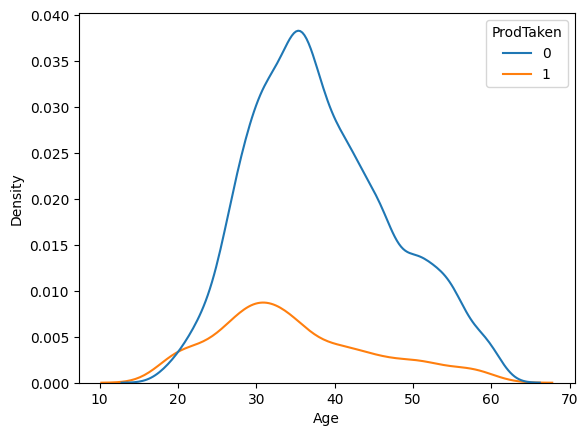

In [57]:
sns.kdeplot(x="Age",data=df,hue="ProdTaken")

**Conclusion**
- Younger Customers (around 25) and middle aged (around 45) will have high chance of taking the package
- Age group 30-35 will not the take the package much

### Q) Do higher income customers have a higher likelihood of taking the package?

<Axes: xlabel='MonthlyIncome', ylabel='Density'>

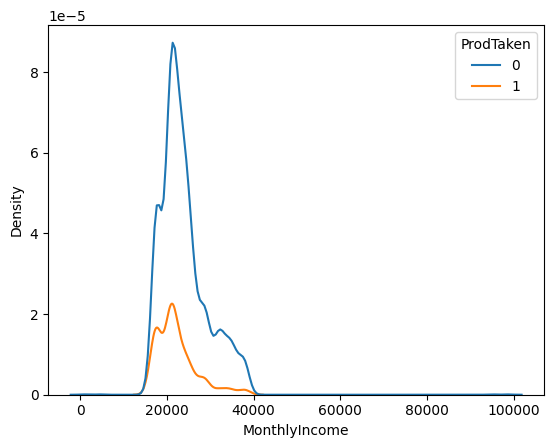

In [58]:
sns.kdeplot(x="MonthlyIncome",data=df,hue="ProdTaken")

**Conclusion**

- Both groups have a significant number of customers around the \(20,000\) units monthly income mark.
- Customers with monthly incomes slightly lower (\(15,000\) to \(20,000\) units) are more likely to take the holiday package compared to those who do not take it.
- Higher-income customers (above \(40,000\) units) are more represented in the group that takes the holiday package, although their numbers are still relatively low.

### Q) Do longer or shorter pitches result in more package purchases?

<Axes: xlabel='DurationOfPitch', ylabel='Density'>

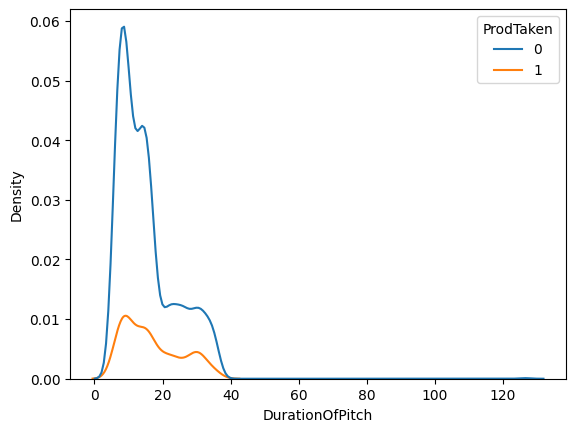

In [59]:
sns.kdeplot(x="DurationOfPitch",data=df,hue="ProdTaken")

**Conclusion**

- shorter pitches result in higher chance of purchasing the package.
- Longer pitches have lower chance of purchasing package

### Q) Does one type of contact method lead to more package purchases than others?

<Axes: xlabel='ProdTaken'>

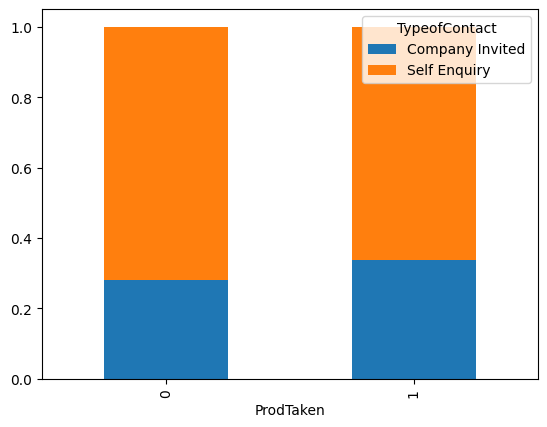

In [60]:
crosstab = pd.crosstab(df['ProdTaken'], df['TypeofContact'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='TypeofContact', ylabel='count'>

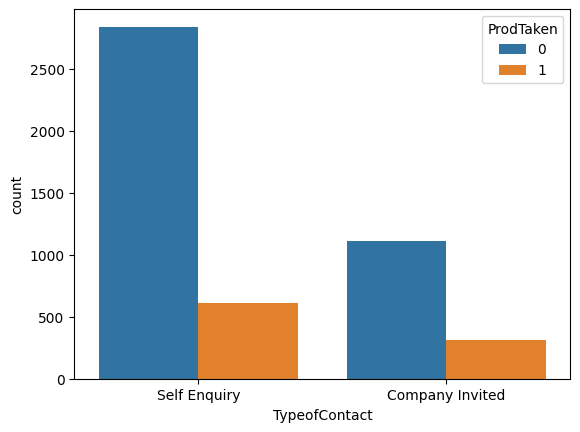

In [61]:
sns.countplot(x="TypeofContact",hue="ProdTaken",data=df)

**Conclusion**

- Self-Enquiry have a higher rate of conversion as compared to company invited
- Regardless of TypeOfContact, Majority of the customers do not take the package

### Q) Are customers from certain city tiers more likely to take the package?


<Axes: xlabel='ProdTaken'>

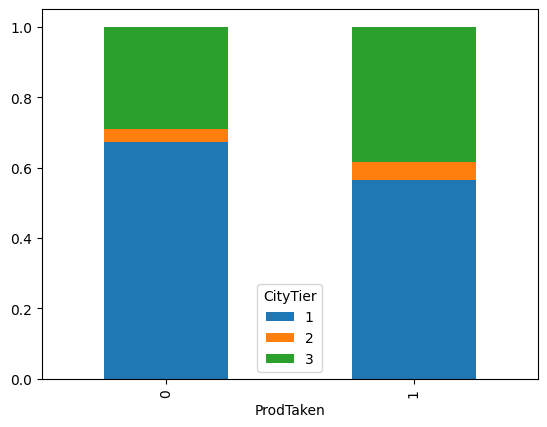

In [62]:
crosstab = pd.crosstab(df['ProdTaken'], df['CityTier'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='CityTier', ylabel='count'>

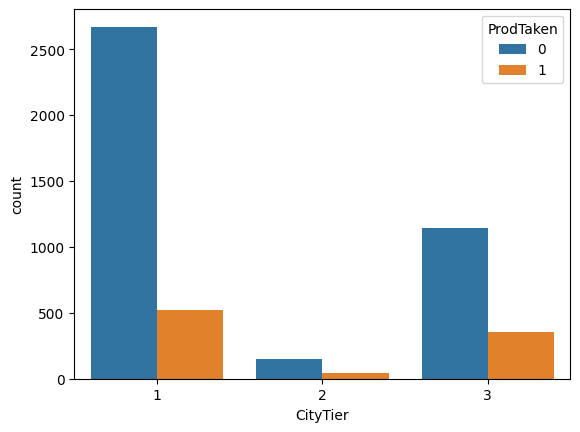

In [63]:
sns.countplot(x="CityTier",hue="ProdTaken",data=df)

**Conclusion**

- All the city tiers have almost same conversion rate.
- Customer from City Tier 1 purchase the package more as compared to 3 tier

### Q) Are customers in certain occupations more likely to take the package?

<Axes: xlabel='ProdTaken'>

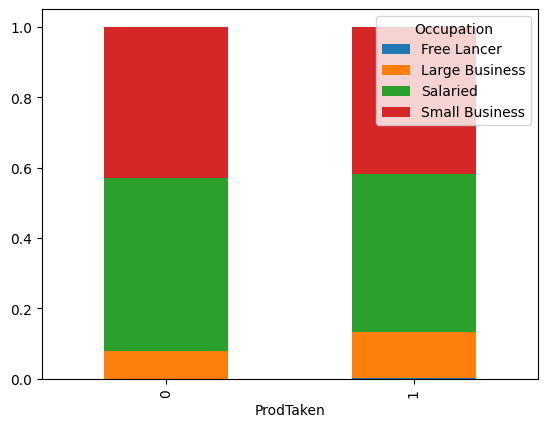

In [64]:
crosstab = pd.crosstab(df['ProdTaken'], df['Occupation'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Occupation', ylabel='count'>

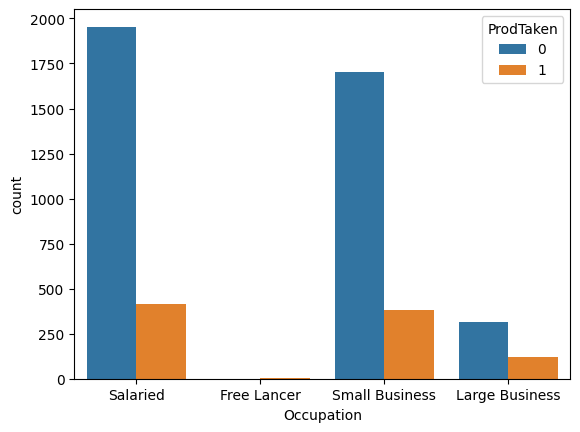

In [65]:
sns.countplot(x="Occupation",hue="ProdTaken",data=df)

### Q) Are certain products more successful in terms of uptake?

<Axes: xlabel='ProdTaken'>

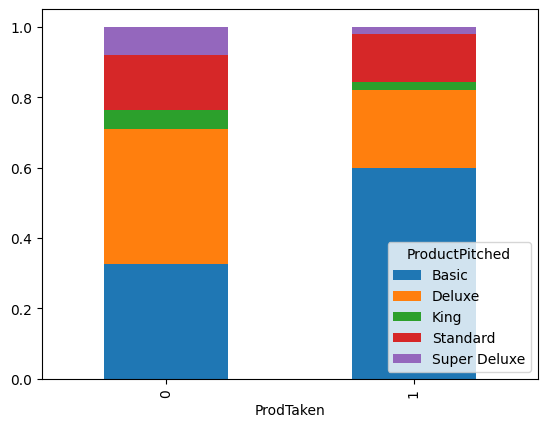

In [66]:
crosstab = pd.crosstab(df['ProdTaken'], df['ProductPitched'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='ProductPitched', ylabel='count'>

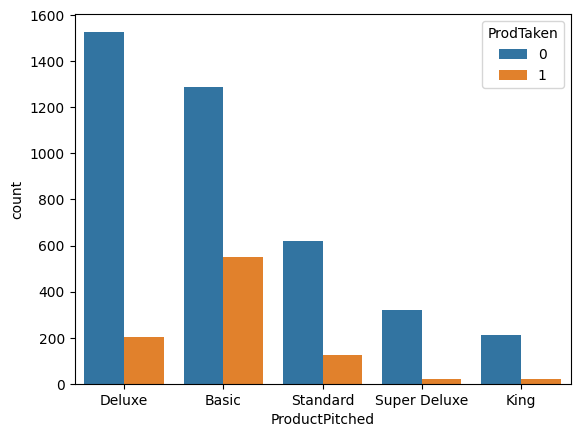

In [67]:
sns.countplot(x="ProductPitched",hue="ProdTaken",data=df)

**Conclusion**
- Customers mostly prefer Basic package followed by Standard package
- Deluxe and Basic package both have a higher conversion rate

### Q) Do customers preferring higher or lower star ratings tend to take the package more?


<Axes: xlabel='ProdTaken'>

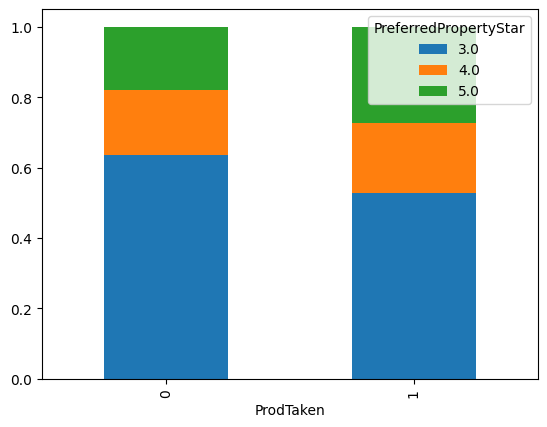

In [68]:
crosstab = pd.crosstab(df['ProdTaken'], df['PreferredPropertyStar'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='PreferredPropertyStar', ylabel='count'>

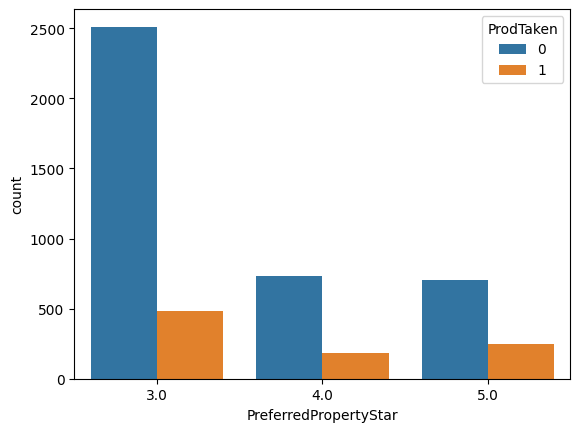

In [69]:
sns.countplot(x="PreferredPropertyStar",hue="ProdTaken",data=df,)

**Conclusion**

- Higher conversion rate is for 5 star hotels
- Mostly customer prefers to go to 3 star hotels followed by 5 star hotels

### Q) Are married or single customers more likely to take the package?

<Axes: xlabel='ProdTaken'>

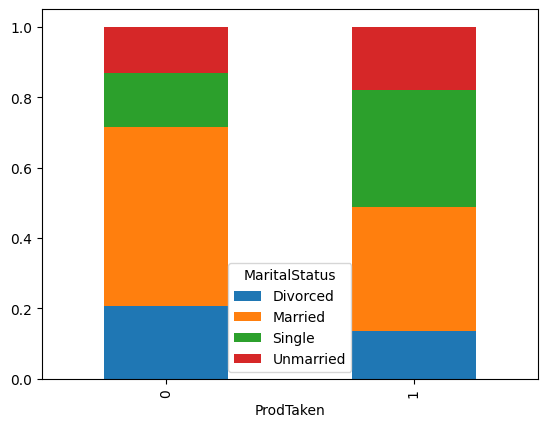

In [70]:
crosstab = pd.crosstab(df['ProdTaken'], df['MaritalStatus'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='MaritalStatus', ylabel='count'>

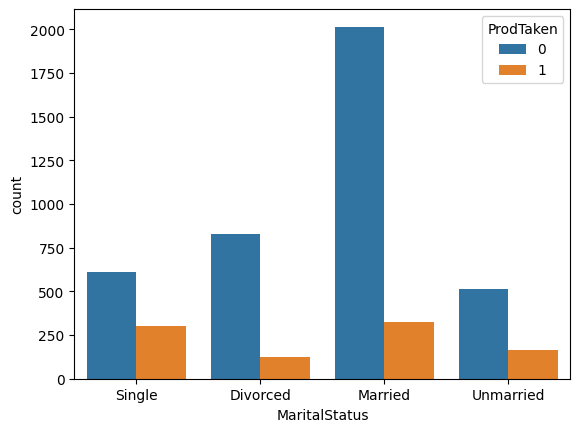

In [71]:
sns.countplot(x="MaritalStatus",hue="ProdTaken",data=df)

**Conclusion**

- Single customers have a higher conversion rate 
- Married customer purchase package a lot

### Q) Are customers with passports more likely to take the package?

<Axes: xlabel='ProdTaken'>

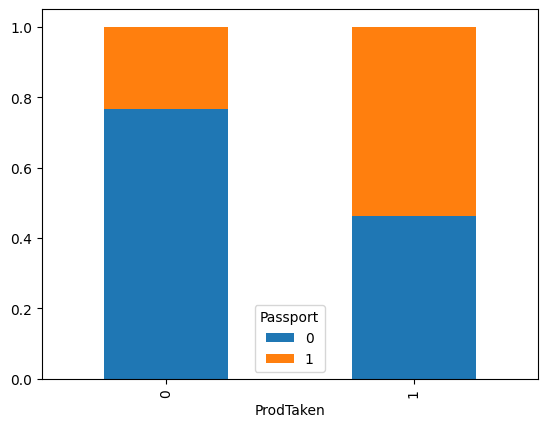

In [72]:
crosstab = pd.crosstab(df['ProdTaken'], df['Passport'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Passport', ylabel='count'>

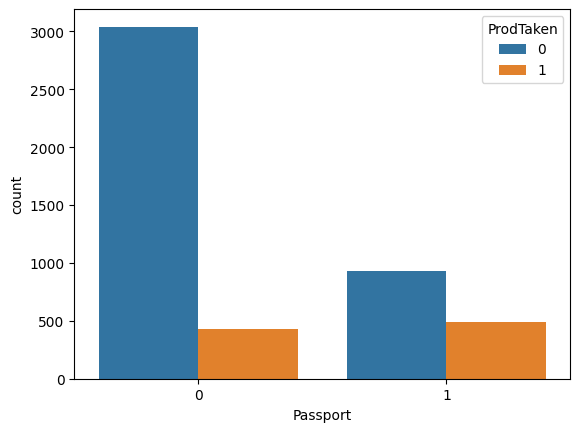

In [73]:
sns.countplot(x="Passport",hue="ProdTaken",data=df)

**Conclusion**

- Customers who have Passport will have higher chance of purchasing the package and they have higher conversion rate also

### Q) Are car owners more likely to take the package?


<Axes: xlabel='ProdTaken'>

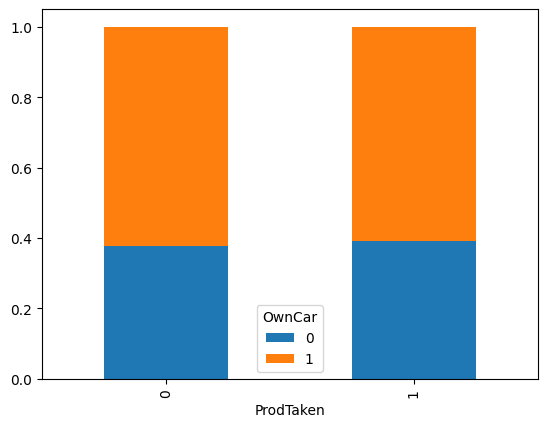

In [74]:
crosstab = pd.crosstab(df['ProdTaken'], df['OwnCar'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='OwnCar', ylabel='count'>

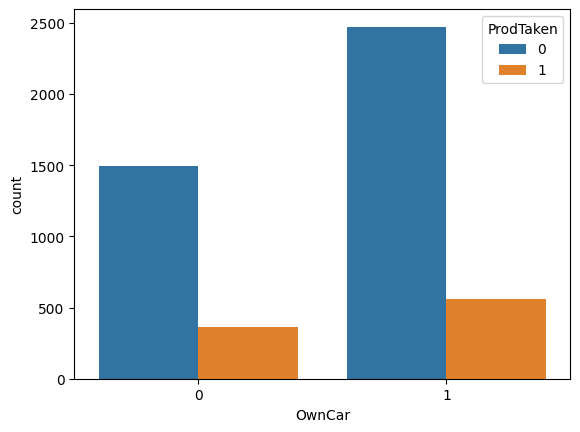

In [75]:
sns.countplot(x="OwnCar",hue="ProdTaken",data=df)

**Conclusion**

- Both have equal chances of purchasing the package

### Q) Do more follow-ups lead to higher package purchase rates?

<Axes: xlabel='ProdTaken'>

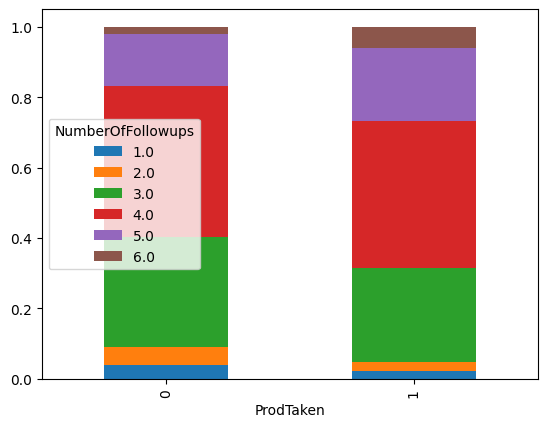

In [76]:
crosstab = pd.crosstab(df['ProdTaken'], df['NumberOfFollowups'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='NumberOfFollowups', ylabel='count'>

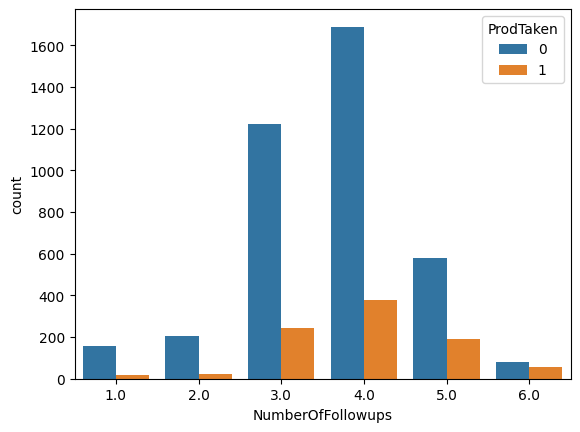

In [77]:
sns.countplot(x="NumberOfFollowups",hue="ProdTaken",data=df)

**Conclusion**

- Higher the number of followups , more the chance of customer purchasing the package

### Q) Do higher satisfaction scores result in more package purchases?


<Axes: xlabel='ProdTaken'>

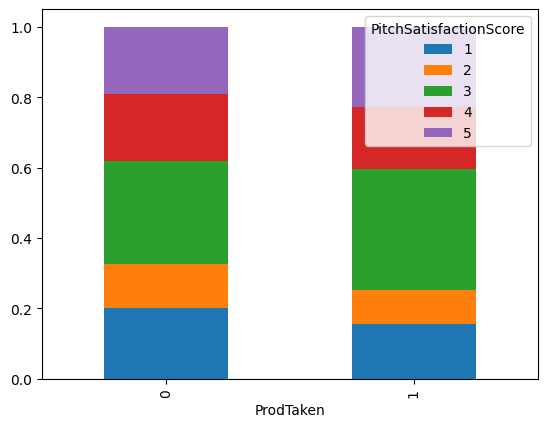

In [78]:
crosstab = pd.crosstab(df['ProdTaken'], df['PitchSatisfactionScore'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='PitchSatisfactionScore', ylabel='count'>

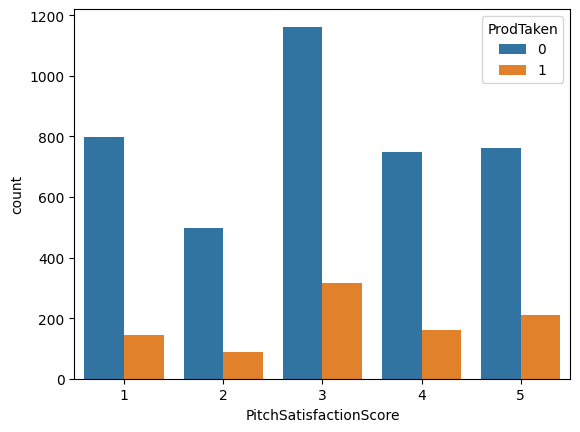

In [79]:
sns.countplot(x="PitchSatisfactionScore",hue="ProdTaken",data=df)

**Conclusion**

- Higher the PitchSatisfactionScore , more the chance of customer purchasing the package

### Q) Do frequent travelers have a higher or lower likelihood of purchasing the package?

<Axes: xlabel='ProdTaken'>

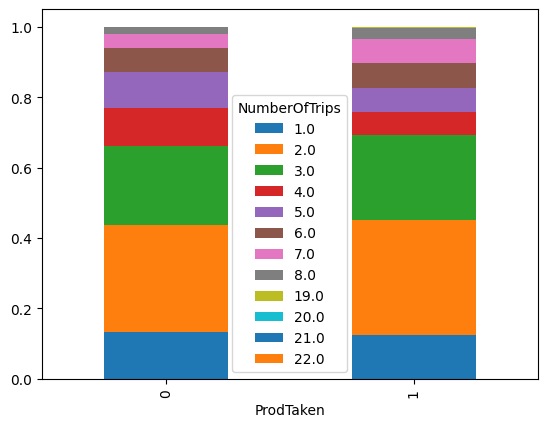

In [80]:
crosstab = pd.crosstab(df['ProdTaken'], df['NumberOfTrips'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='NumberOfTrips', ylabel='count'>

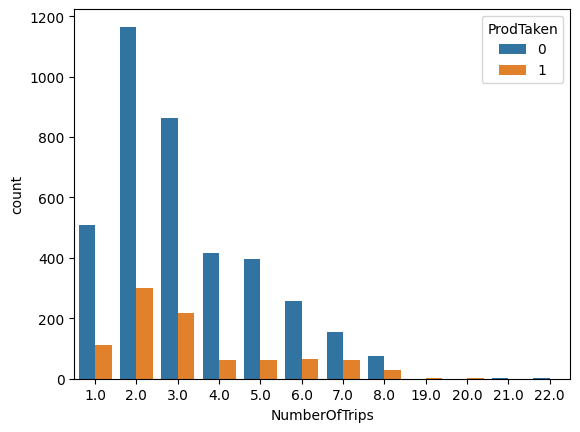

In [81]:
sns.countplot(x="NumberOfTrips",hue="ProdTaken",data=df)

**Conclusion**

- Customer who's average number of Trips is 2 , have higher chances of purchasing the package

### Q) Is there a significant difference in package uptake based on the number of persons visiting?

<Axes: xlabel='ProdTaken'>

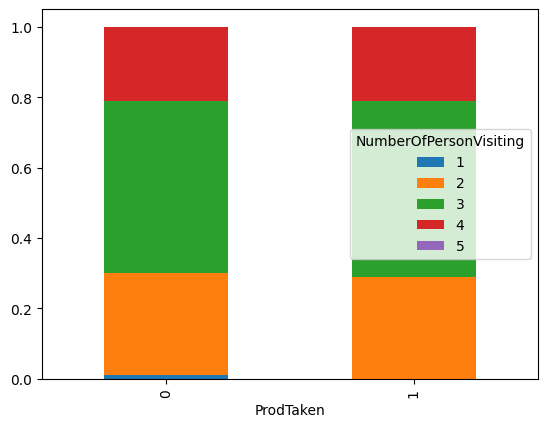

In [82]:
crosstab = pd.crosstab(df['ProdTaken'], df['NumberOfPersonVisiting'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='NumberOfPersonVisiting', ylabel='count'>

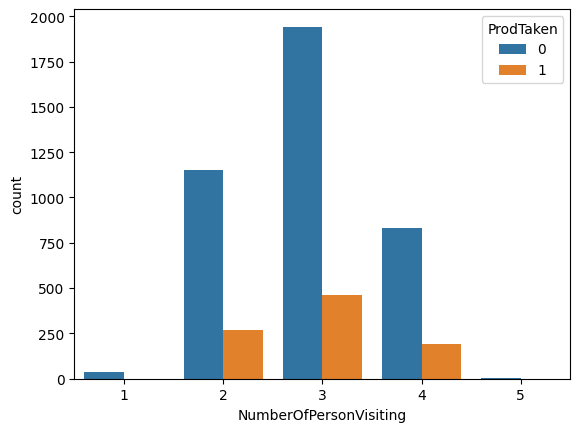

In [83]:
sns.countplot(x="NumberOfPersonVisiting",hue="ProdTaken",data=df)

**Conclusion**

- Customer who have 2, 3 or 4 people together , have higher chances of purchasing the package

### Q) Do families with more children tend to take the package more?

<Axes: xlabel='ProdTaken'>

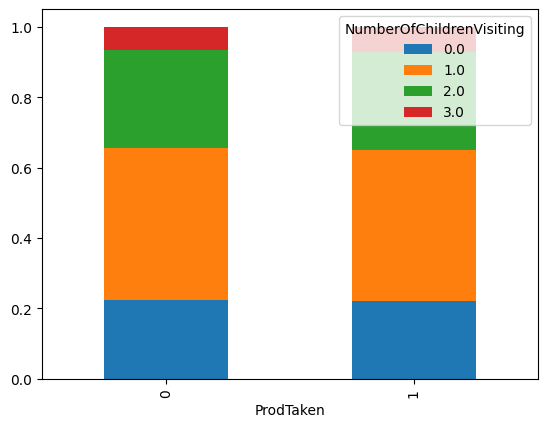

In [84]:
crosstab = pd.crosstab(df['ProdTaken'], df['NumberOfChildrenVisiting'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='NumberOfChildrenVisiting', ylabel='count'>

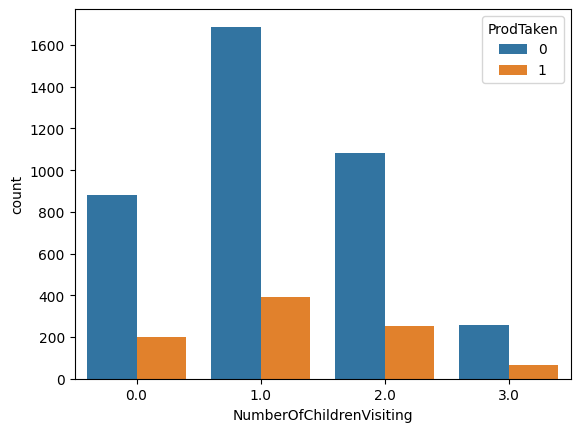

In [85]:
sns.countplot(x="NumberOfChildrenVisiting",hue="ProdTaken",data=df)

**Conclusion**

- Higher the number of children , less chance of purchasing the package

### Q) Are customers in higher or lower job designations more likely to purchase the package?


<Axes: xlabel='ProdTaken'>

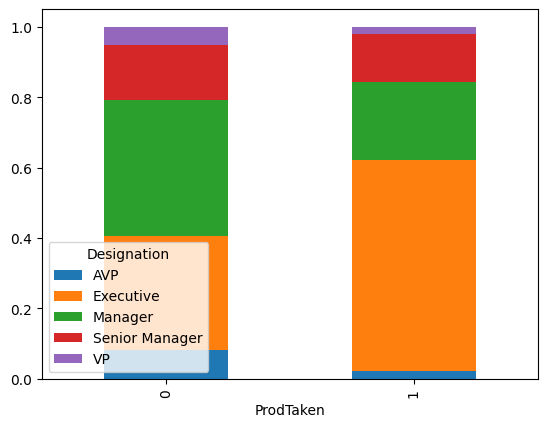

In [86]:
crosstab = pd.crosstab(df['ProdTaken'], df['Designation'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Designation', ylabel='count'>

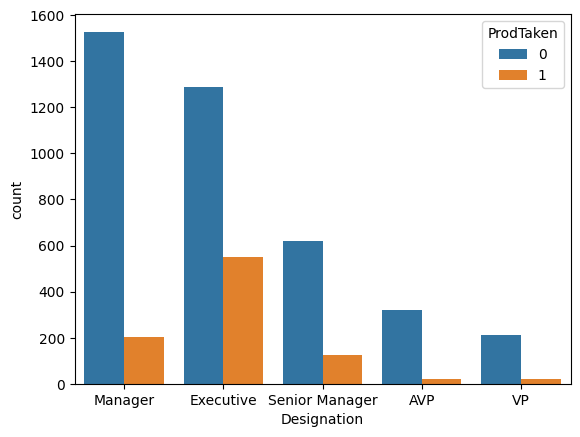

In [87]:
sns.countplot(x="Designation",hue="ProdTaken",data=df)

**Conclusion**

- Customers who have Executive Designation have higher chance of purchasing the package

### Q) Do males or females have a higher likelihood of purchasing the package?

<Axes: xlabel='ProdTaken'>

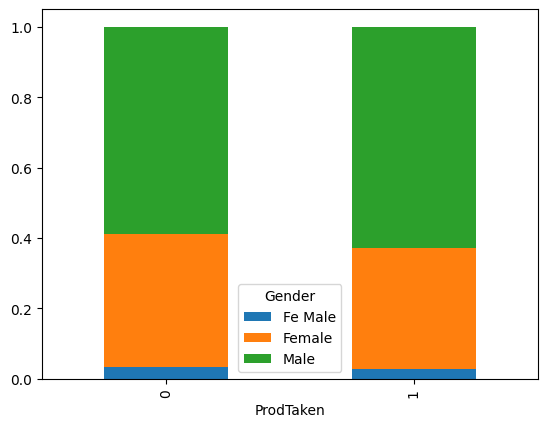

In [88]:
crosstab = pd.crosstab(df['ProdTaken'], df['Gender'], normalize='index')
crosstab.plot(kind='bar', stacked=True)

<Axes: xlabel='Gender', ylabel='count'>

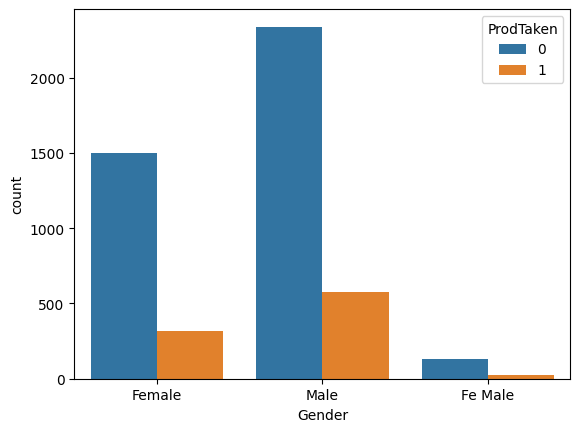

In [89]:
sns.countplot(x="Gender",hue="ProdTaken",data=df)

**Conclusion**

- Male have higher chance of purchasing the package